In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from pylab import savefig

In [2]:
df2019 = pd.read_csv('2019 Stack Overflow Survey Responses.csv')
print(df2019.columns)
print(df2019.shape)

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [3]:
drop_list_2019 = ['Respondent','CurrencyDesc', 'FizzBuzz', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'SurveyLength', 'SurveyEase' ]
df2019 = df2019.drop(drop_list_2019, axis=1)
print(df2019.shape)

(88883, 67)


In [4]:
df2019.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [5]:
### Which columns doesn't have any missing values
no_null = set(df2019.columns[df2019.isnull().mean()==0])
no_null

{'Hobbyist', 'OpenSourcer'}

#### Checking the magnitude of missing values in the data

In [6]:
qaurter_null = set(df2019.columns[df2019.isnull().mean()<=0.25])
len(qaurter_null)

50

In [7]:
half_null = set(df2019.columns[df2019.isnull().mean()>=0.25])
half_null

{'BlockchainIs',
 'BlockchainOrg',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'UnitTests',
 'WebFrameDesireNextYear',
 'WebFrameWorkedWith',
 'WorkWeekHrs'}

Majority of them have missing values lesser than 25% of values

In [58]:
#After checking that non of the variables have majority missing values drop the nas
df2019 = df2019.dropna(how="any").reset_index()

Text(0.5, 1.0, 'Do you work remote?')

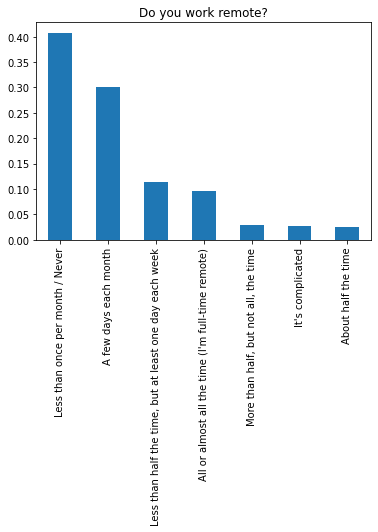

In [9]:
workremote_counts = df2019['WorkRemote'].value_counts()
(workremote_counts/df2019.shape[0]).plot(kind='bar');
plt.title("Do you work remote?")

##### Since different categories are there to the variable of interest narrowing down them to major categories

In [ ]:
for i in range(0, df2019.shape[0]):
    if (df2019.at[i,'WorkRemote'] == "A few days each month" or df2019.at[i,'WorkRemote']== "Less than half the time, but at least one day each week"):
        df2019.at[i,'WorkRemoteNew'] = 'Less than half the time'
    elif(df2019.at[i,'WorkRemote'] =='About half the time' or df2019.at[i,'WorkRemote'] == 'More than half, but not all, the time' ):
        df2019.at[i,'WorkRemoteNew'] = 'Half the time or more'
    elif(df2019.at[i,'WorkRemote'] == "All or almost all the time (I'm full-time remote)"):
        df2019.at[i,'WorkRemoteNew'] = 'Full time remote'
    elif(df2019.at[i,'WorkRemote'] == 'Less than once per month / Never'):
        df2019.at[i,'WorkRemoteNew'] = 'Never'
    else:
        df2019.at[i,'WorkRemoteNew'] = df2019.at[i,'WorkRemote']

Checking remote work distribution among developers

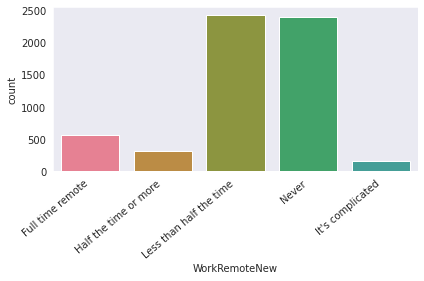

In [59]:
sns.set_style("dark")
ax = sns.countplot(x='WorkRemoteNew', data=df2019, palette=sns.color_palette("husl", 8), order=['Full time remote','Half the time or more','Less than half the time','Never',"It's complicated"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig('svm_conf1.png')

#### Averaging Worktime of developers groupbed by their work remote status

In [12]:
pd.DataFrame(df2019.groupby(['WorkRemoteNew']).mean()['WorkWeekHrs'])

,WorkWeekHrs
WorkRemoteNew,
Full time remote,41.402900
Half the time or more,42.250784
It's complicated,44.018293
Less than half the time,42.256178
Never,42.451043


##### Dividing into two major categories as remote and not remote
Developers who are full remote, half time or more remote are classified here as remote

In [14]:
for i in range(0, df2019.shape[0]):
    if (df2019.at[i,'WorkRemoteNew'] == "Full time remote" or df2019.at[i,'WorkRemoteNew']== "Half the time or more"):
        df2019.at[i,'WorkRemoteCat'] = 'Remote Work'
    else:
        df2019.at[i,'WorkRemoteCat'] = 'Not Remote'

Social media engagement of two remote worker categories

/home/sachini/pyenvs/test/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sachini/pyenvs/test/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sachini/pyenvs/test/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sachini/pyenvs/test/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sachini/pyenvs/test/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sachini/pyenvs/test/lib/python3.6/site-packages/matplotlib/backe

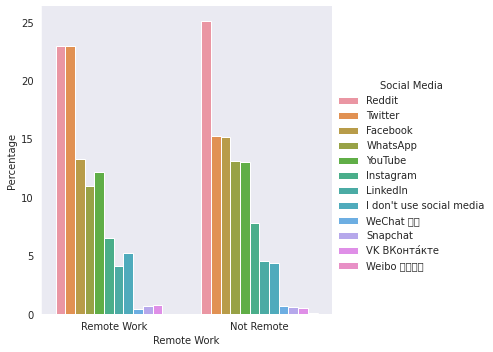

In [16]:
x,y = 'WorkRemoteCat', 'SocialMedia'

(df2019
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',order=['Remote Work','Not Remote']).set(xlabel='Remote Work', ylabel='Percentage')._legend.set_title("Social Media"))
plt.savefig('svm_conf3.png')

Extraversion tendencies of remote worker categories

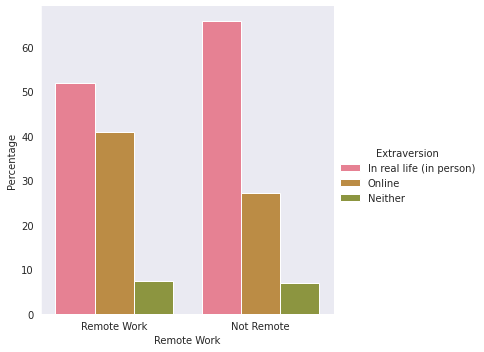

In [17]:
x,y = 'WorkRemoteCat', 'Extraversion'

(df2019
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',order=['Remote Work','Not Remote'],palette=sns.color_palette("husl", 8)).set(xlabel='Remote Work', ylabel='Percentage'))
plt.savefig('svm_conf4.png')

Organization size

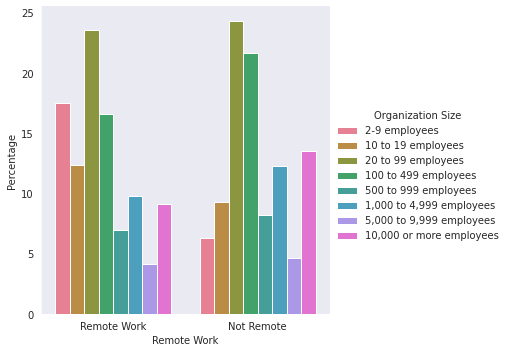

In [19]:
x,y = 'WorkRemoteCat', 'OrgSize'

(df2019
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',
      order=['Remote Work','Not Remote'],
      hue_order = ["2-9 employees","10 to 19 employees","20 to 99 employees","100 to 499 employees","500 to 999 employees","1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees"],
      palette=sns.color_palette("husl", 8)).set(xlabel='Remote Work', ylabel='Percentage')._legend.set_title("Organization Size"))
plt.savefig('svm_conf5.png')

Average salary for remote work groups

In [20]:
salary_tab = pd.DataFrame(df2019.groupby(['WorkRemoteNew']).mean()['ConvertedComp'])
salary_tab.rename(columns={"ConvertedComp": "Average Salary"})

,Average Salary
WorkRemoteNew,
Full time remote,158238.697715
Half the time or more,167248.774295
It's complicated,98286.646341
Less than half the time,159321.371087
Never,133921.937005


Job satisfaction of remote work groups

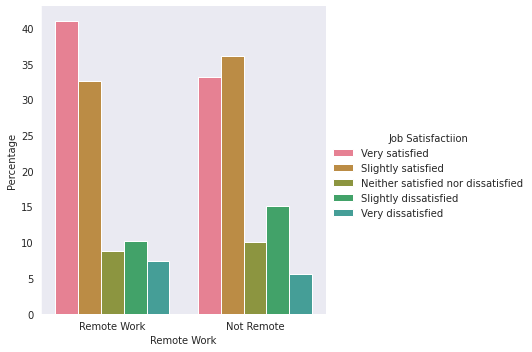

In [21]:
x,y = 'WorkRemoteCat', 'JobSat'

(df2019
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',
      order=['Remote Work','Not Remote'],
      hue_order = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied","Very dissatisfied"],
      palette=sns.color_palette("husl", 8)).set(xlabel='Remote Work', ylabel='Percentage')._legend.set_title("Job Satisfactiion"))
plt.savefig('svm_conf6.png')